In [1]:

dataset_name = "TNBC"
path_to_hdf5 = f"../results/compute_patches/{dataset_name}/patches.hdf5"


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


def get_all_dataset_paths(h5file):
    """Recursively get all dataset paths in the HDF5 file."""
    paths = []
    def visitor(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5file.visititems(visitor)
    return paths



Found datasets: ['TNBC10_CN5_E1_patch000', 'TNBC10_CN5_E1_patch001', 'TNBC10_CN5_E1_patch002', 'TNBC10_CN5_E1_patch003', 'TNBC10_CN5_E1_patch004', 'TNBC10_CN5_E1_patch005', 'TNBC10_CN5_E1_patch006', 'TNBC10_CN5_E1_patch007', 'TNBC10_CN5_E1_patch008', 'TNBC10_CN5_E1_patch009', 'TNBC10_CN5_E1_patch010', 'TNBC10_CN5_E1_patch011', 'TNBC10_CN5_E1_patch012', 'TNBC10_CN5_E1_patch013', 'TNBC10_CN5_E1_patch014', 'TNBC10_CN5_E1_patch015', 'TNBC10_CN5_E1_patch016', 'TNBC10_CN5_E1_patch017', 'TNBC10_CN5_E1_patch018', 'TNBC10_CN5_E1_patch019', 'TNBC10_CN5_E1_patch020', 'TNBC10_CN5_E1_patch021', 'TNBC10_CN5_E1_patch022', 'TNBC10_CN5_E1_patch023', 'TNBC10_CN5_E1_patch024', 'TNBC10_CN5_E1_patch025', 'TNBC10_CN5_E1_patch026', 'TNBC10_CN5_E1_patch027', 'TNBC10_CN5_E1_patch028', 'TNBC10_CN5_E1_patch029', 'TNBC10_CN5_E1_patch030', 'TNBC10_CN5_E1_patch031', 'TNBC10_CN5_E1_patch032', 'TNBC10_CN5_E1_patch033', 'TNBC10_CN5_E1_patch034', 'TNBC10_CN5_E1_patch035', 'TNBC10_CN5_E1_patch036', 'TNBC10_CN5_E1_patch0

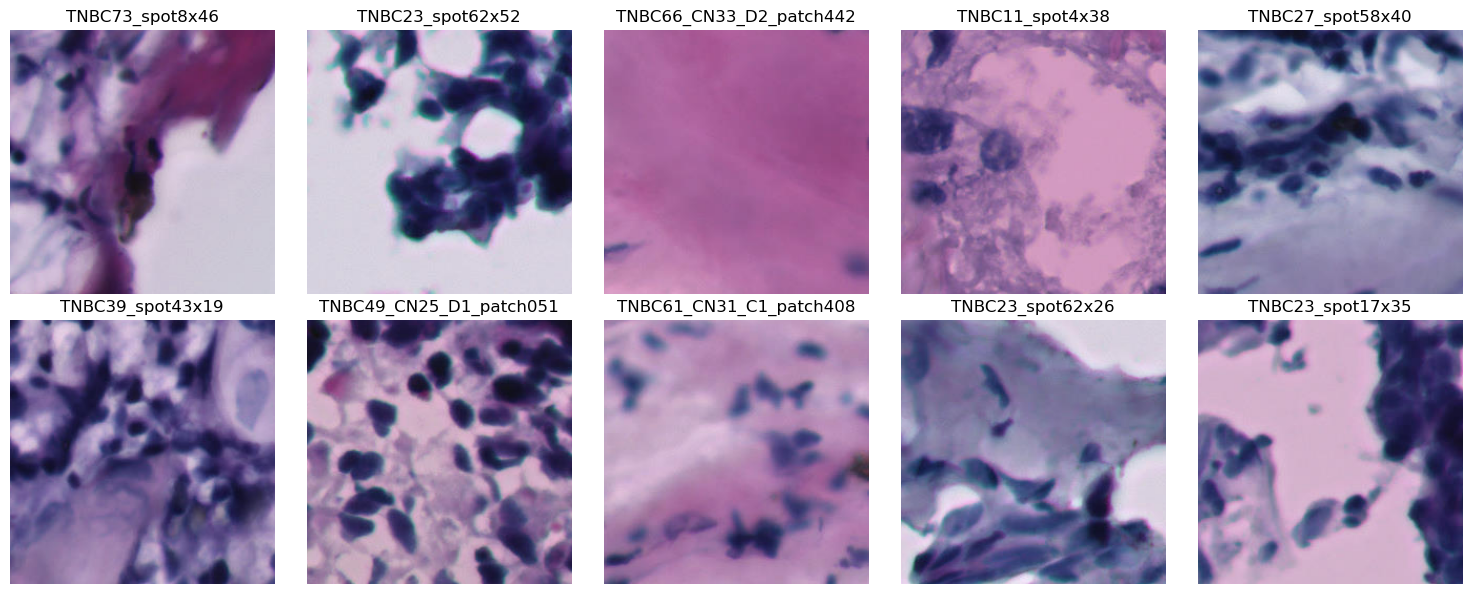

In [3]:

with h5py.File(path_to_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    print("Found datasets:", dataset_paths)
    chosen = np.random.choice(dataset_paths, size=10, replace=False)
    plt.figure(figsize=(15, 6))
    for i, ds_path in enumerate(chosen):
        data = f[ds_path][()]
        # If the image is grayscale, add cmap='gray'
        plt.subplot(2, 5, i + 1)
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')
        else:
            plt.imshow(data.astype(np.uint8))
        plt.axis('off')
        plt.title(ds_path)
    plt.tight_layout()
    plt.show()

In [6]:
import seaborn as sns
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [24]:
from skimage.measure import shannon_entropy


In [25]:
entropies = []

with h5py.File(path_to_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    
    # sample randomly 50'000 datasets
    dataset_paths = np.random.choice(dataset_paths, size=50000, replace=False)
    
    for ds_path in dataset_paths:
        data = f[ds_path][()]
        ent = shannon_entropy(data)
        entropies.append(ent)


In [26]:
len(entropies)

50000

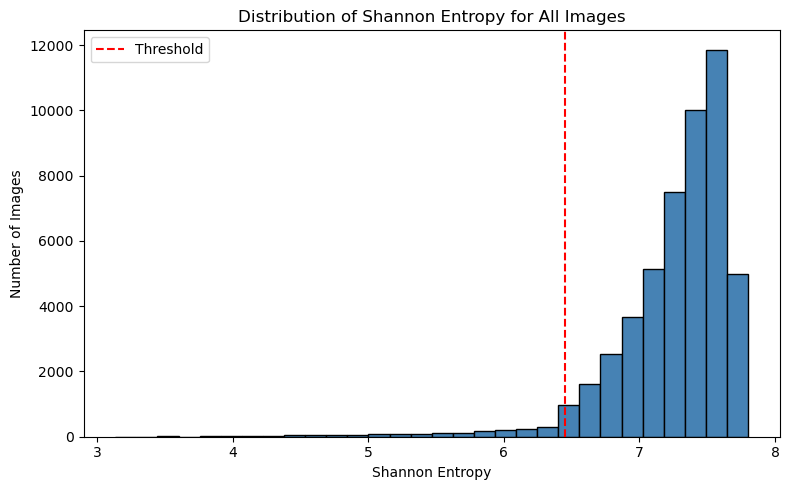

In [27]:

# Plot the entropy distribution
plt.figure(figsize=(8, 5))
plt.hist(entropies, bins=30, color='steelblue', edgecolor='black')
plt.xlabel("Shannon Entropy")
plt.ylabel("Number of Images")
plt.title("Distribution of Shannon Entropy for All Images")
plt.tight_layout()
SHANNON_ENTROPY_THRESHOLD_1 = 6.451
SHANNON_ENTROPY_THRESHOLD_2 = 5.5

plt.axvline(SHANNON_ENTROPY_THRESHOLD_1, color='red', linestyle='--', label='Threshold')
# plt.axvline(SHANNON_ENTROPY_THRESHOLD_2, color='orange', linestyle='--', label='Threshold 2')
plt.legend()
plt.show()

## HER2

In [18]:
dataset_name = "her2_final_without_A"
path_to_patches = f"/idiap/group/genomics/lfournier/digitalhistopathology/results/compute_patches/{dataset_name}"

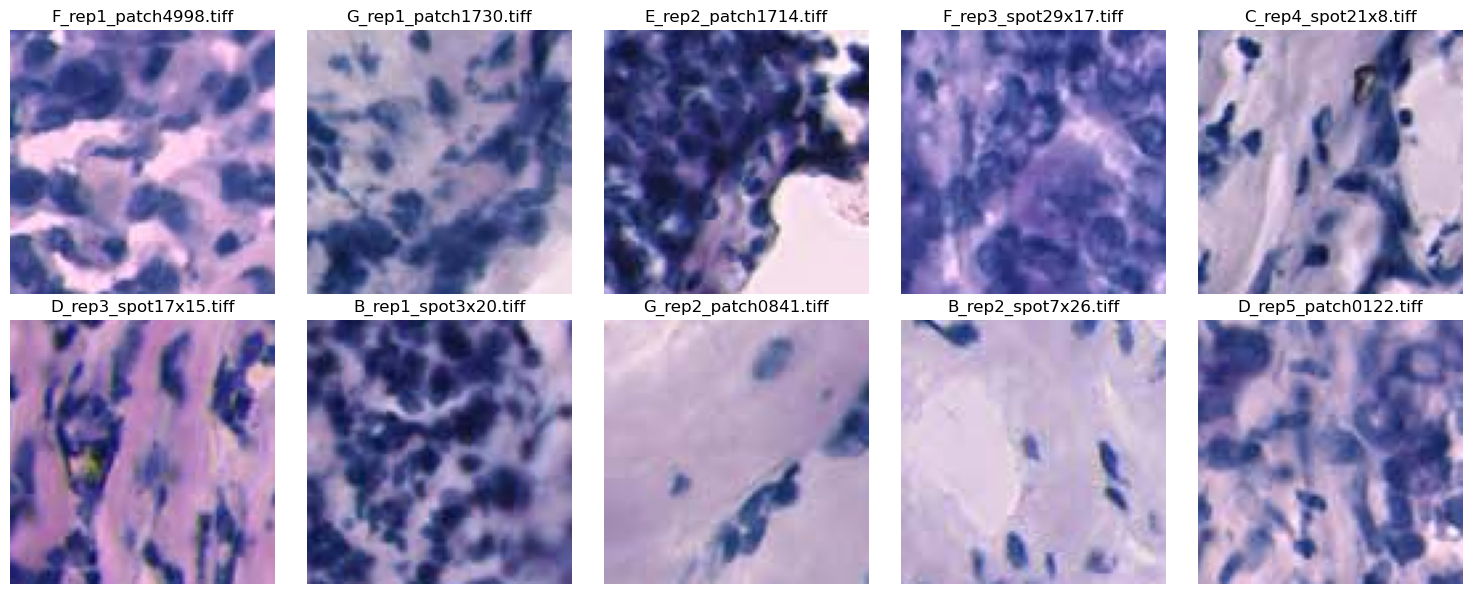

In [19]:
import os
from PIL import Image

# List all .tiff files in the directory
tiff_files = [f for f in os.listdir(path_to_patches) if f.lower().endswith('.tiff')]

# Randomly select 10 files
chosen_files = np.random.choice(tiff_files, size=10, replace=False)

plt.figure(figsize=(15, 6))
for i, fname in enumerate(chosen_files):
    img_path = os.path.join(path_to_patches, fname)
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fname)
plt.tight_layout()
plt.show()